In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# **Customer churn Prediction**
Customer churn is a critical metric for businesses because it is far more cost-effective to retain existing customers than to acquire new ones. To combat churn, telecom companies must be able to predict which customers are at a high risk of churning.

Identifying early signs of potential churn necessitates gaining a comprehensive understanding of customers and their interactions across various channels. These interactions encompass in-person store visits, purchase histories, customer service inquiries, online transactions, and social media engagement, among others.

By addressing churn effectively, businesses in this industry can not only maintain their market position but also thrive and grow. The more customers they retain in their network, the lower the cost of acquisition, and the greater the potential for profit. As a result, reducing customer attrition and implementing a robust retention strategy become the primary focus for achieving success.

**Objectives:**
During this analysis, I will delve into the data to answer several key questions, such as:

What percentage of customers are categorized as churned, and how many continue to use the services actively?

Are there any discernible patterns in churn rates based on gender?

Do customers exhibit specific preferences or patterns of churn based on the types of services they receive?

Which types of services are the most profitable for the company?

What features and services contribute the most to profitability?

These questions, along with others that may arise during the analysis, will help us gain valuable insights into customer behavior and churn within the telecom industry.

# **Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

**Dataset**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
#loading data
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Missing Values**

In [10]:
#Check Null Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

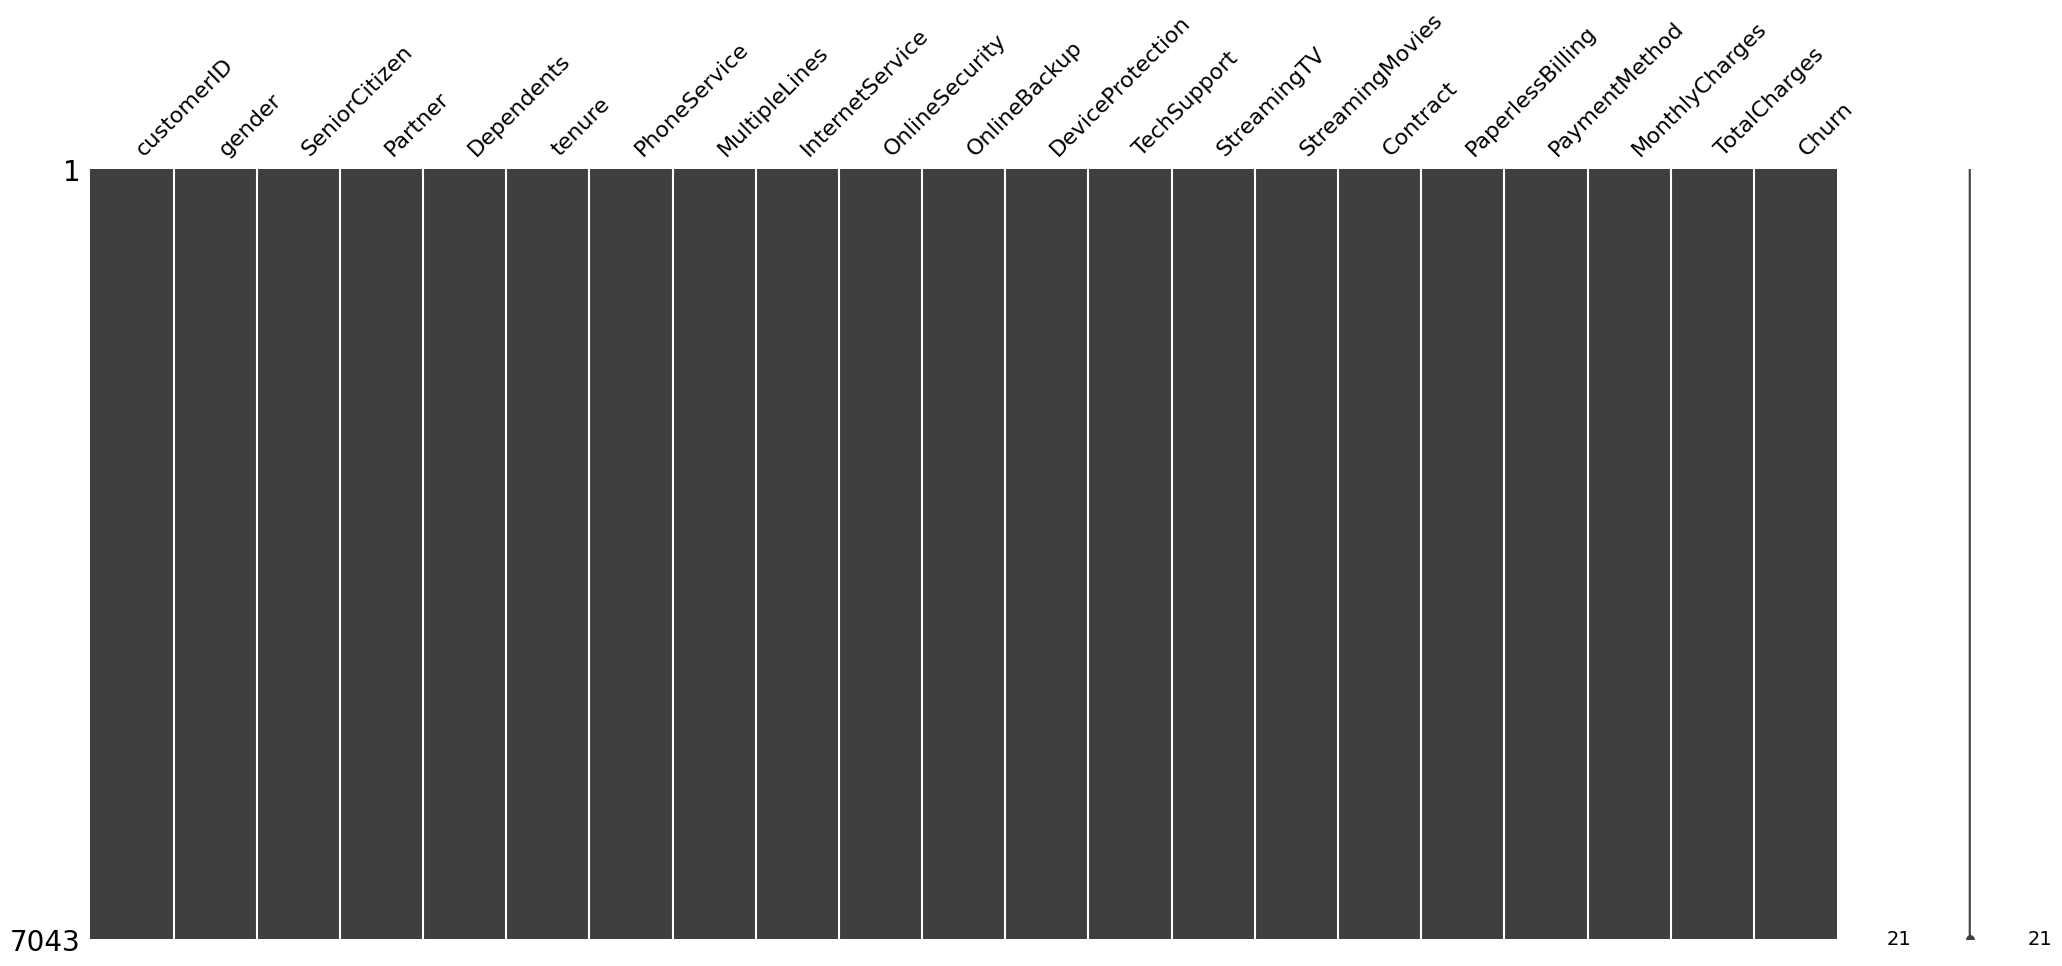

In [11]:
# Visualize missing values as a matrix
msno.matrix(df);

In [12]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
#To check if any column contains Nan
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [14]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no further missing values found in the Tenure column.
Given that there are only 11 rows with missing values in the Tenure column, we can safely remove these rows without significant impact on the dataset.These seem to be related to new customers,so it will have insignificant impact on the prediction.

Lets drop the rows with a tenure value of 0 from the DataFrame df. 

# **Data Exploration & Preprocessing**

In [17]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [18]:
#To check if any column contains Nan
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [19]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Letsmap the values in the "SeniorCitizen" column of the DataFrame df from numeric values (0 and 1) to corresponding string values ("No" and "Yes"

In [20]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The describe method in Pandas typically provides summary statistics for numeric columns by default. If you want to include summary statistics for non-numeric (categorical) columns, you can use the include parameter with the value 'object' to include object (string) columns. However, the 'bool' data type is not typically included in the describe method

In [21]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [22]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Visualisation
This code creates a pie chart with clear labels, titles, and annotations to represent the distributions of gender and churn in a user-friendly manner using Plotly.

In [23]:
# Define labels for gender and churn categories
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add a pie chart for the gender distribution
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)

# Add a pie chart for the churn distribution
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Update layout with a title and annotations
fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)]
)

# Display the pie chart
fig.show()


In [24]:
#number of Churn v/s gender
# Create a crosstab of gender and Churn
crosstab_gender_churn = pd.crosstab(df['gender'], df['Churn'])

# Display the crosstab
crosstab_gender_churn

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


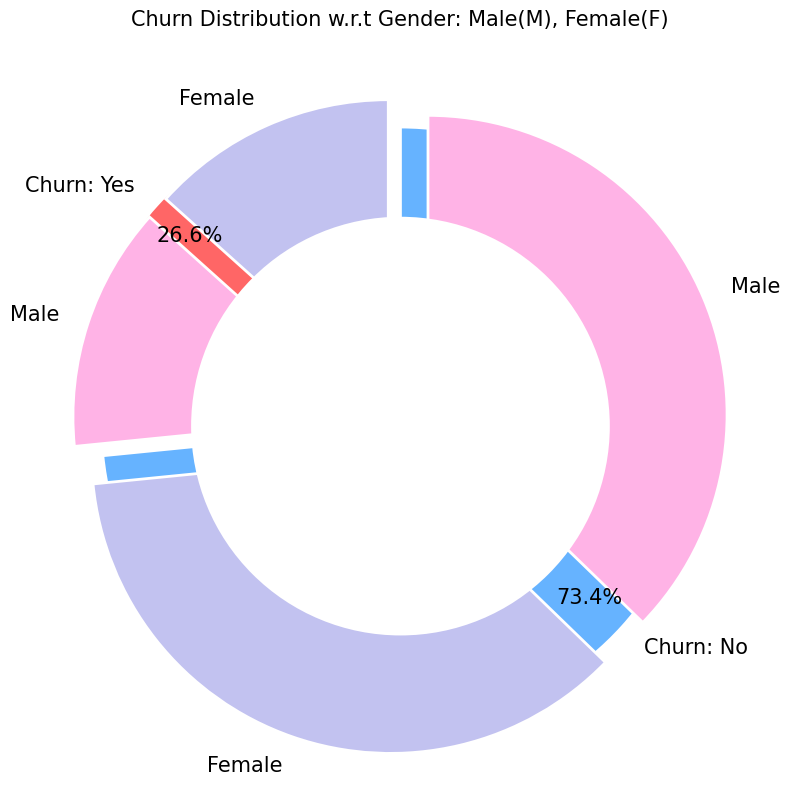

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Churn data
labels_churn = ["Churn: Yes", "Churn: No"]
values_churn = [1869, 5163]
colors_churn = ['#ff6666', '#66b3ff']
explode_churn = (0.1, 0)  # Explode the "Churn: Yes" slice

# Gender data
labels_gender = ["Female", "Male", "Female", "Male"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_gender = (0.1, 0.1, 0.1, 0.1)  # Explode all slices slightly

textprops = {"fontsize": 15}

# Plot the Churn pie chart
plt.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', pctdistance=0.85,
        colors=colors_churn, startangle=90, explode=explode_churn,
        textprops=textprops, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Plot the Gender pie chart
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender,
        startangle=90, explode=explode_gender, textprops=textprops,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Draw a white circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.05)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()




In [26]:
import plotly.express as px

fig = px.pie(df, names='PaymentMethod', title='Payment Method Distribution')
fig.show()

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_relationships_with_churn(df):
    """
    Plot the relationship between all columns and Churn.

    Parameters:
    - df: DataFrame containing the data.

    Returns:
    - None (displays the plots).
    """
    # Exclude non-categorical columns and 'customerID' and 'Churn' columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove("Churn")

    # Determine the number of rows and columns for subplots
    num_cols = 3
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

    # Create subplots
    plt.figure(figsize=(18, 6 * num_rows))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(x=column, hue="Churn", data=df, palette="Set2")
        plt.title(f"Relationship between {column} and Churn")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.legend(title="Churn", labels=["No", "Yes"])
    
    plt.tight_layout()
    plt.show()


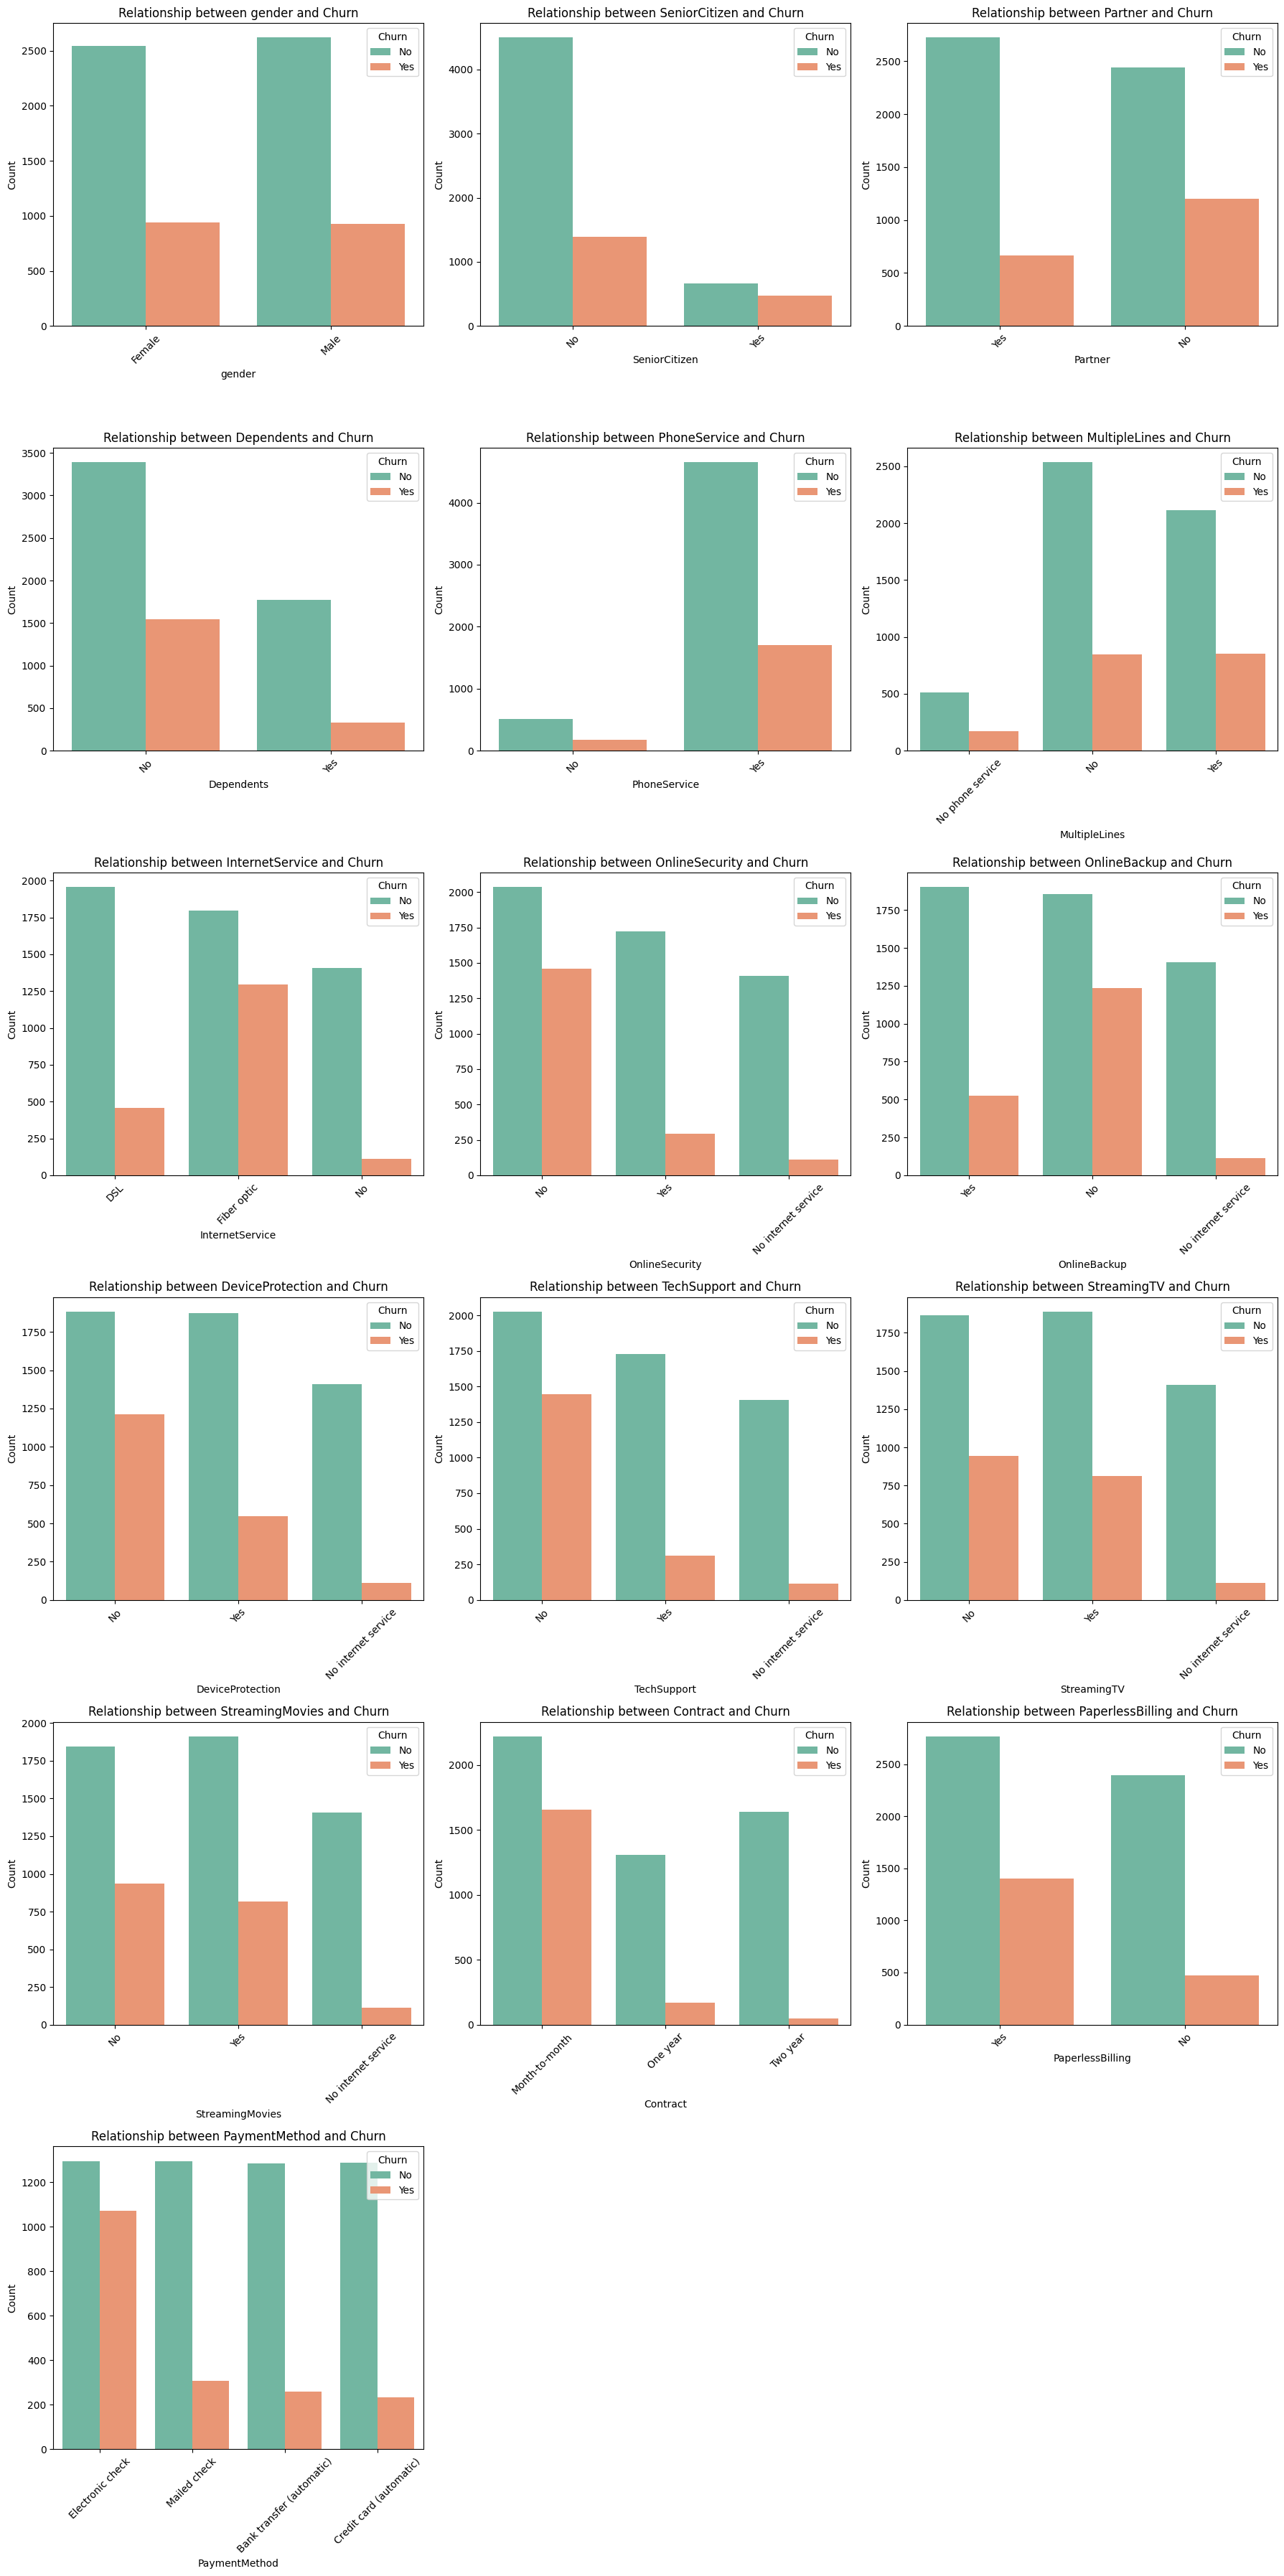

In [28]:
plot_relationships_with_churn(df)

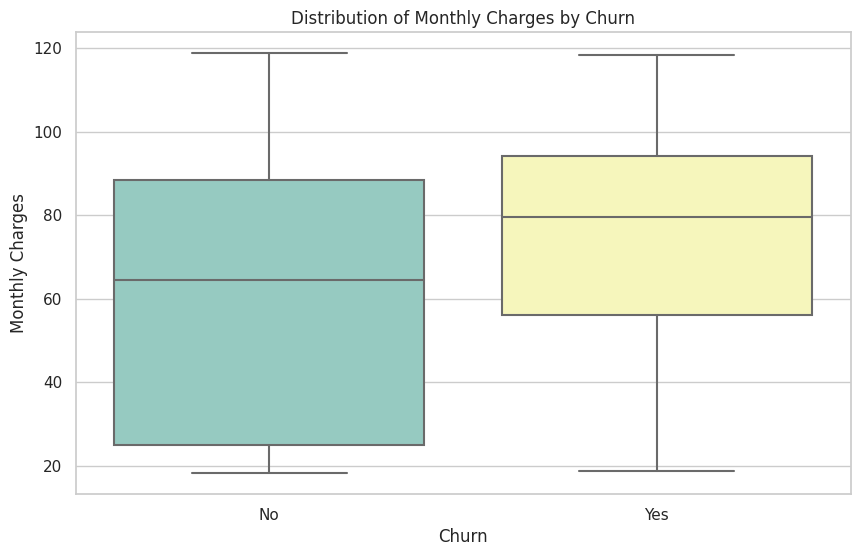

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set3")
plt.title("Distribution of Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

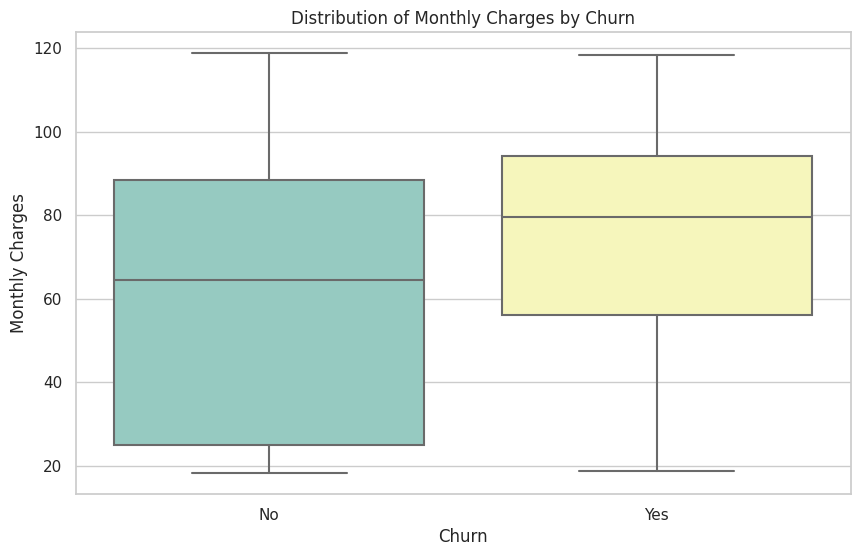

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set3")
plt.title("Distribution of Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_normal_distribution_charts(df, target_column):
    """
    Plot normal distribution charts for columns with respect to the target column.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The target column for which the normal distribution charts are generated.

    Returns:
    - None (displays the charts).
    """
    # Filter the DataFrame to include only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Determine the number of rows and columns for subplots
    num_cols = 2
    num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

    # Create subplots
    plt.figure(figsize=(15, 5 * num_rows))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        
        # Plot histograms for Churn: Yes and Churn: No
        sns.histplot(df[df["Churn"] == "No"][column], kde=True, label="Churn: No", color="blue")
        sns.histplot(df[df["Churn"] == "Yes"][column], kde=True, label="Churn: Yes", color="red")
        
        plt.title(f"Normal Distribution for {column} by Churn")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.legend()
        
        # Check for normality using Shapiro-Wilk test
        stat, p = stats.shapiro(df[column])
        if p < 0.05:
            plt.text(0.05, 0.9, "Not Normal", fontsize=12, transform=plt.gca().transAxes, color="red")
        else:
            plt.text(0.05, 0.9, "Normal", fontsize=12, transform=plt.gca().transAxes, color="green")

    plt.tight_layout()
    plt.show()


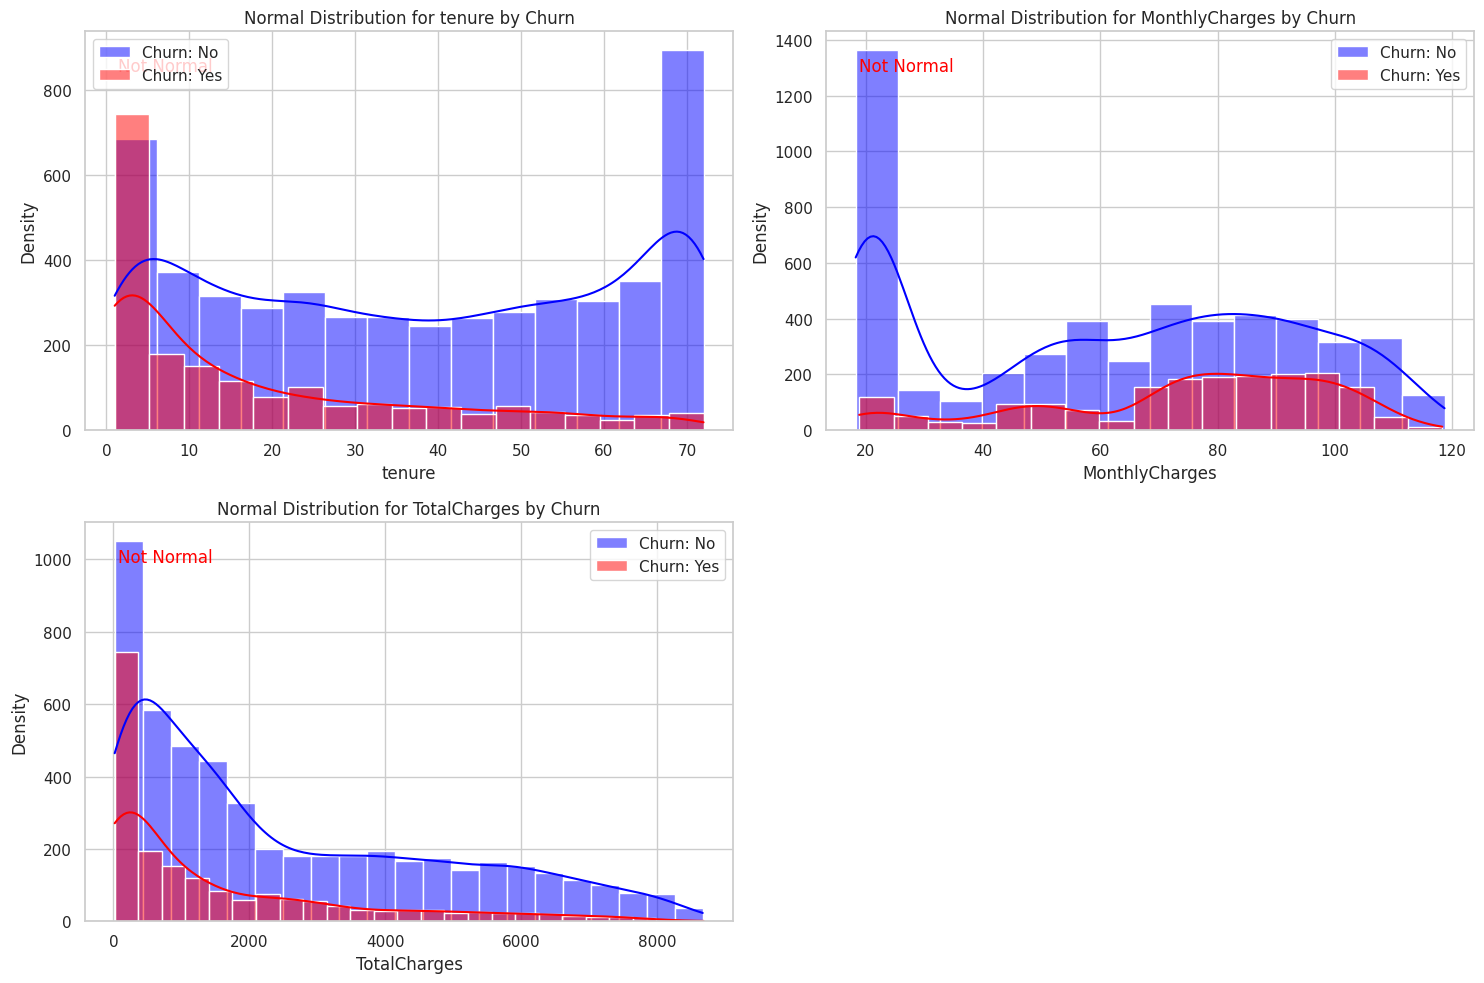

In [32]:
plot_normal_distribution_charts(df, "Churn")


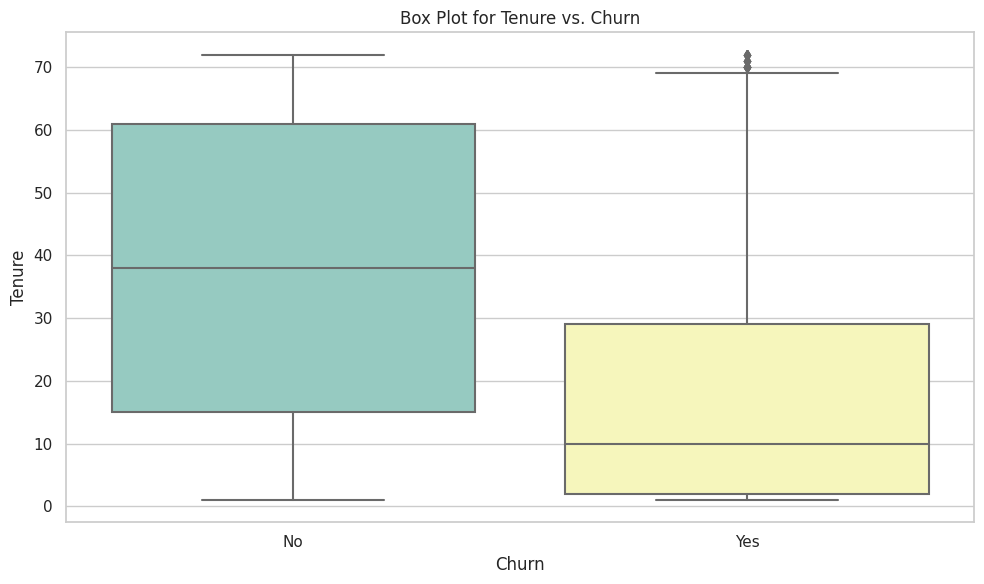

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="tenure", palette="Set3")
plt.title("Box Plot for Tenure vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
    
plt.tight_layout()
plt.show()

# **Correlation**

Lets create creates a heatmap of the correlation matrix for the columns in DataFrame df. Lets apply factorization to encode non-numeric columns and then computes the correlation between these encoded columns

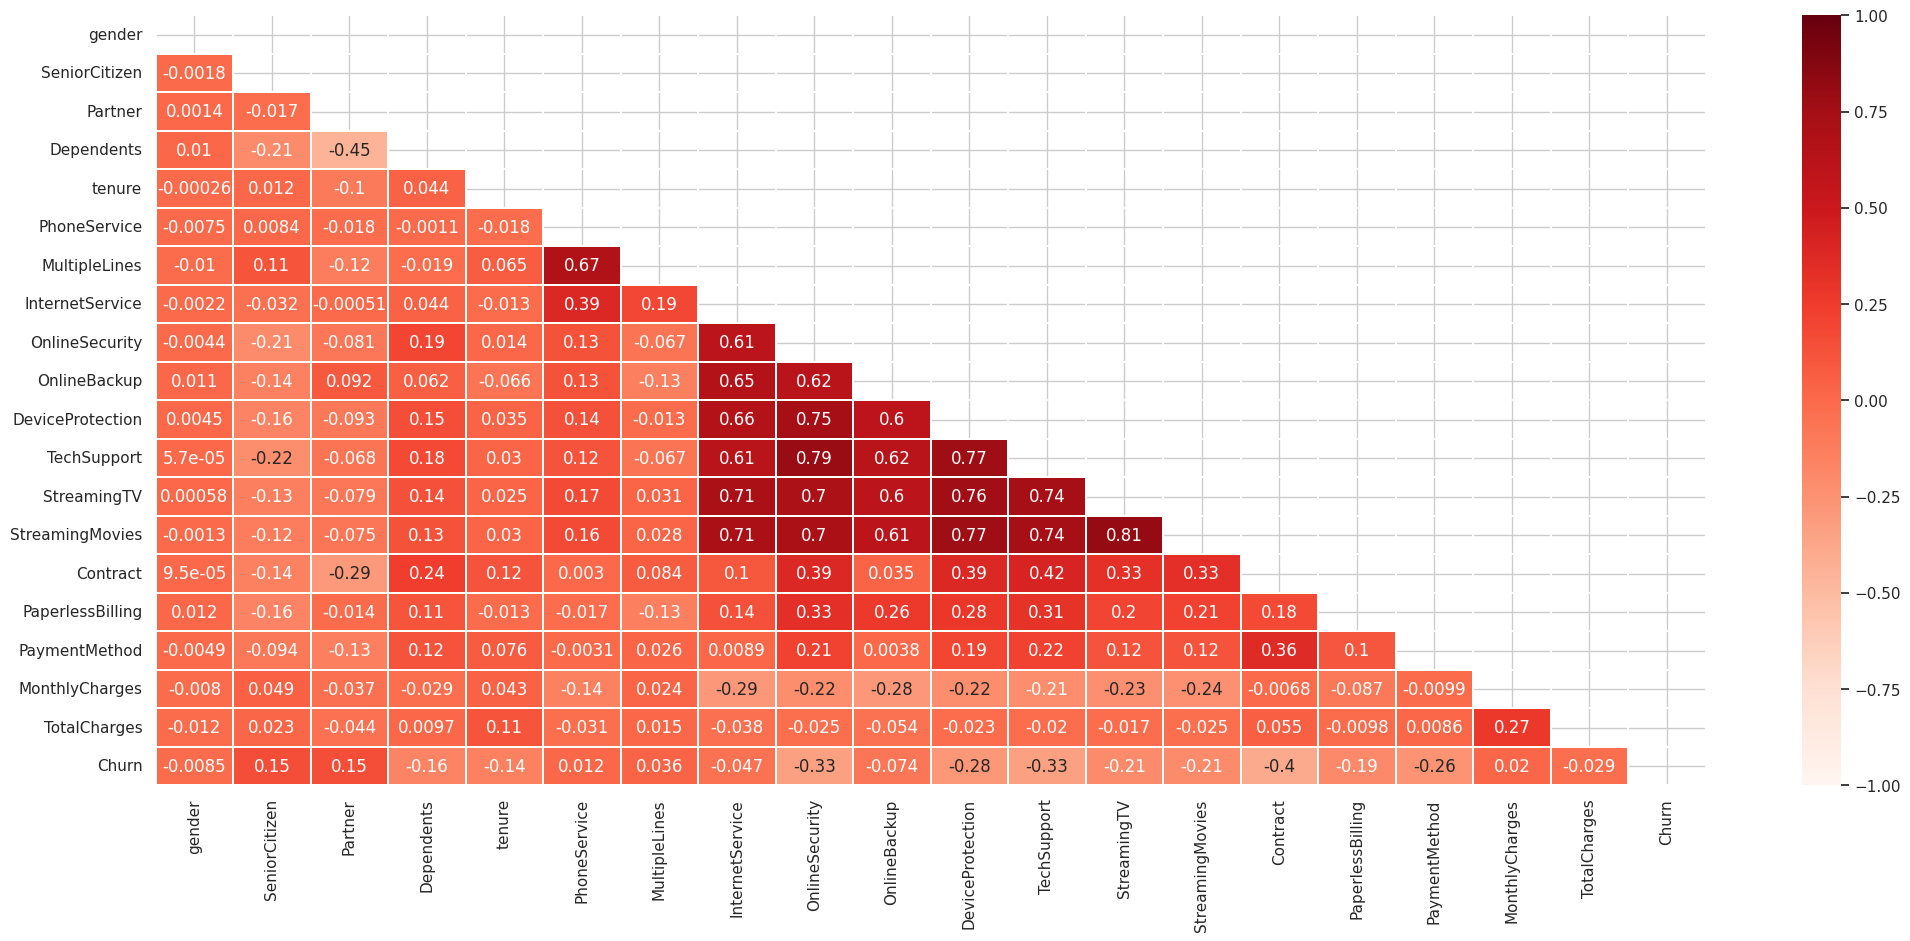

In [34]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.1, cmap='Reds', vmin=-1, vmax=1)

Lets  convert object (categorical) columns to integer values using the LabelEncoder from Scikit-Learn

In [35]:
from sklearn.preprocessing import LabelEncoder

def object_to_integer(dataframe_series):
    if dataframe_series.dtype == 'object':
        label_encoder = LabelEncoder()
        dataframe_series = label_encoder.fit_transform(dataframe_series)
    return dataframe_series

In [36]:
df = df.apply(lambda x: object_to_integer(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


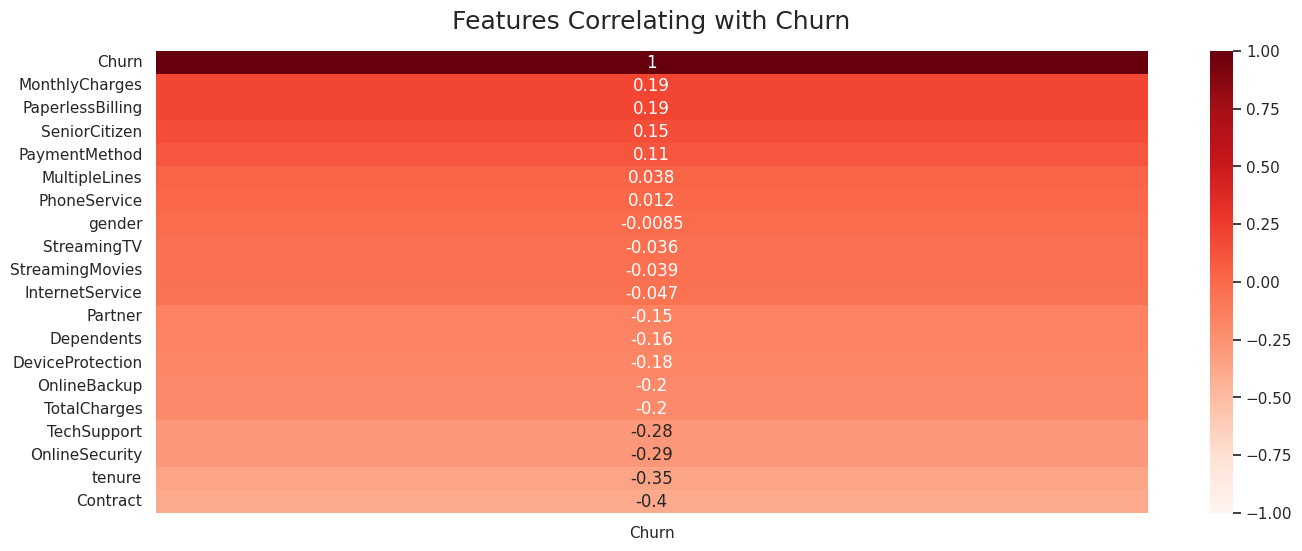

In [37]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

In [38]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [39]:
from sklearn.model_selection import train_test_split
f1 = X
t1 = y
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [40]:
x_train1.shape

(5625, 19)

In [41]:
y_train1.shape

(5625,)

# **Imbalanced Data- SMOTE Oversampling**

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [42]:
import imblearn       #library to balance the data
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#SMOTE Balancing
over = SMOTE(sampling_strategy = 'auto')
under = RandomUnderSampler(sampling_strategy = 'auto')
steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(x_train1, y_train1)
Counter(t2)

Counter({0: 4130, 1: 4130})

In [43]:
f2.shape

(8260, 19)

# **Machine Learning Models**

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# **Model Fitting & Model Evaluation**

We will try different models and will be comparinng these models across different parameters for model evaluations.

Define the funtion 'model' to fit the model, get Cross validation Score, ROCAUC score and ROC AUC Plot.

ROC AUC Score- The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points

Define the function 'model evaluation' to get confusion matrix and classification report.

Confusion matrix Confusion matrix is cross tabulation of actuals v/s predictions. It is used in classification problems to assess where errors in the model were made.

F-score F-score is the "harmonic mean" of precision and sensitivity.It considers both false positive and false negative cases and is good for imbalanced datasets.

In [45]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC AUC Plot', fontsize=14)
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Reds',xticklabels=['NoChurn', 'Churn'],
            yticklabels=['NoChurn', 'Churn'],fmt ='')

    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
      # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [46]:
# get importance
target = 'Churn'
predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges']
def model_imp(classifier):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': classifier.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()


**Logistic Regression**

Cross Validation Score :  84.25%
ROC_AUC Score :  70.92%


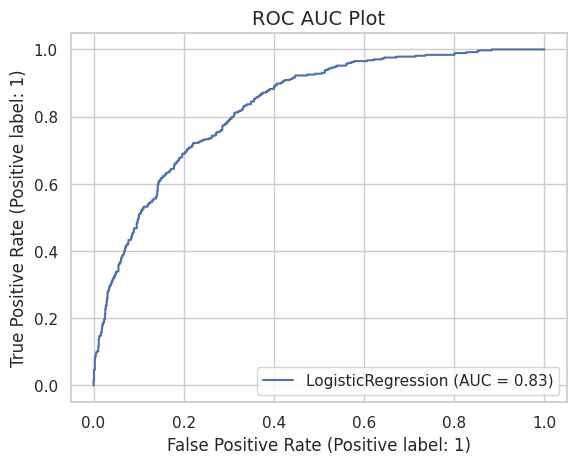

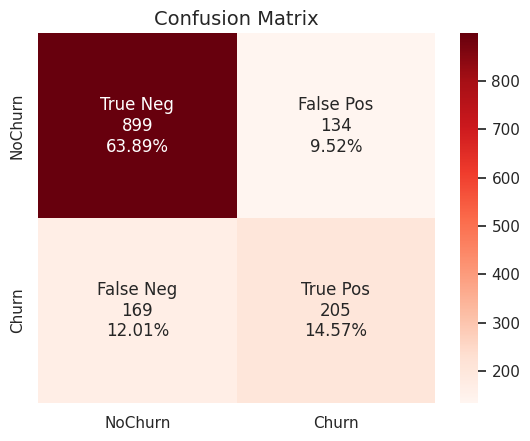

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.60      0.55      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [47]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
classifier_lr = LogisticRegression(random_state = 0, C=10, penalty= 'l2')
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

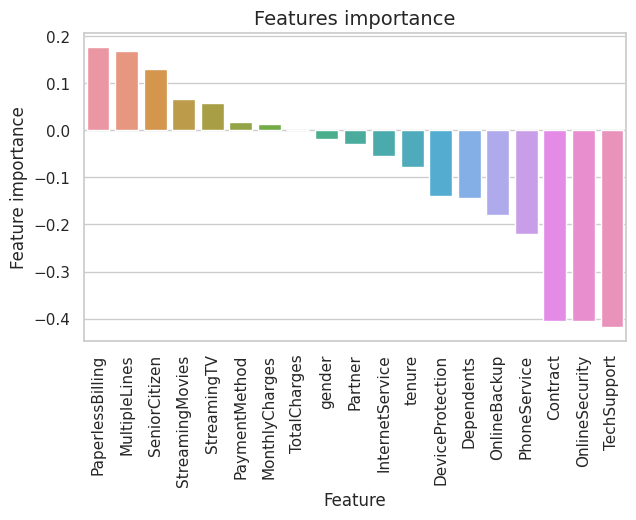

In [48]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': classifier_lr.coef_[0]})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [49]:
if len(predictors) == len(classifier_lr.coef_[0]):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': classifier_lr.coef_[0]})
    tmp = tmp.sort_values(by='Feature importance', ascending=False)
    plt.figure(figsize=(7, 4))
    # Rest of your code for plotting
else:
    print("The arrays 'predictors' and 'classifier_lr.coef_[0]' must have the same length.")

<Figure size 700x400 with 0 Axes>

# **Decision Tree**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

Advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualized.
Requires little data preparation. This module does not support missing values.
The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
Able to handle multi-output problems.
Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

Cross Validation Score :  81.81%
ROC_AUC Score :  67.35%


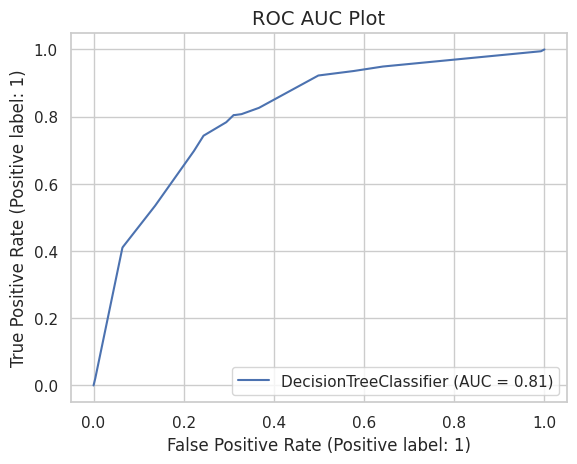

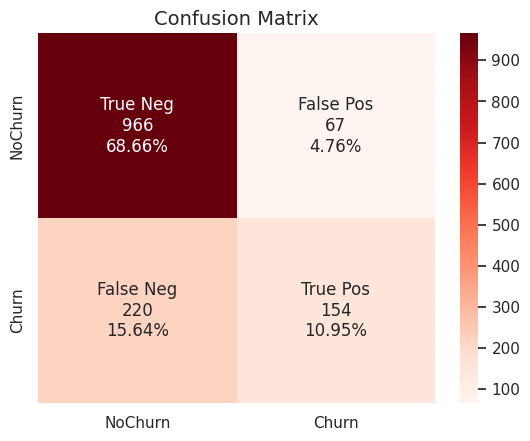

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1033
           1       0.70      0.41      0.52       374

    accuracy                           0.80      1407
   macro avg       0.76      0.67      0.69      1407
weighted avg       0.78      0.80      0.78      1407



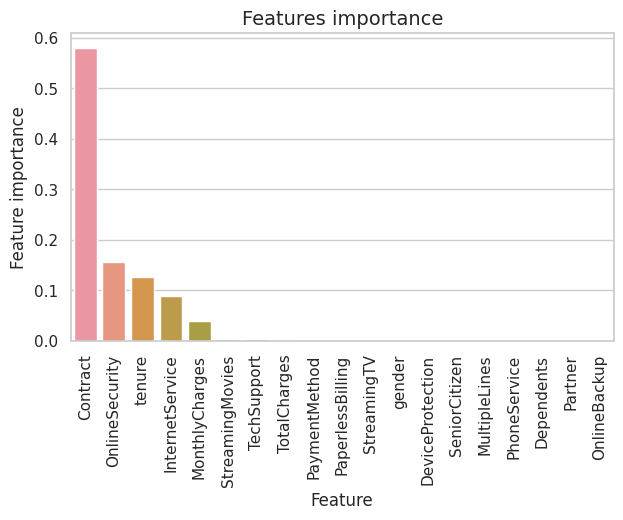

In [50]:

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)
model_imp(classifier_dt)

# Support vector machines (SVMs)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

Cross Validation Score :  79.12%
ROC_AUC Score :  50.00%


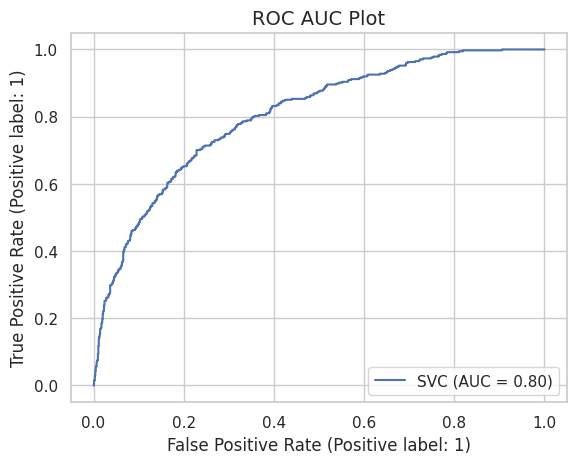

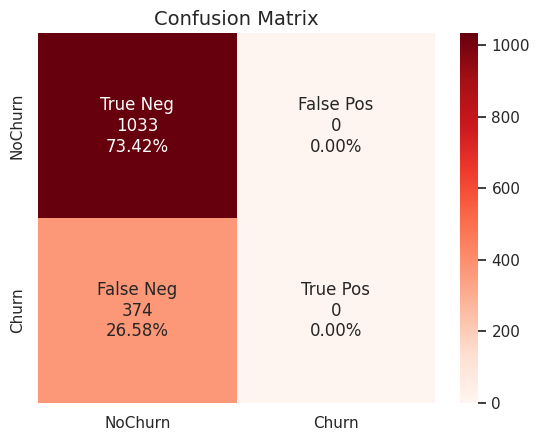

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



In [51]:
#Support VectorClassifier
from sklearn import svm
classifier_svm = svm.SVC()
model(classifier_svm,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svm,x_test1,y_test1)


Cross Validation Score :  73.50%
ROC_AUC Score :  65.86%


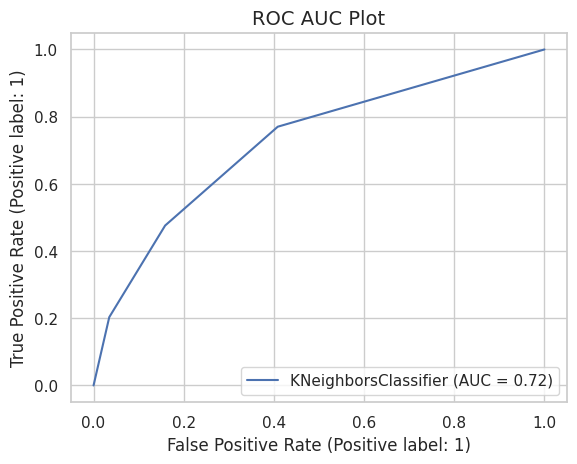

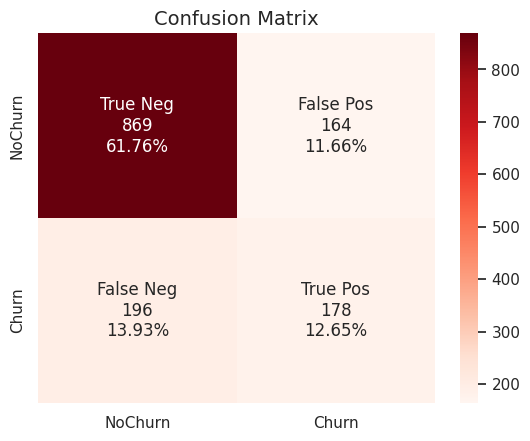

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1033
           1       0.52      0.48      0.50       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



In [52]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)


Cross Validation Score :  84.75%
ROC_AUC Score :  72.31%


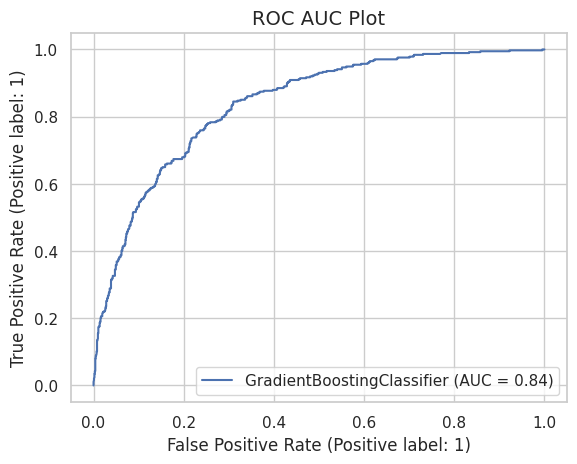

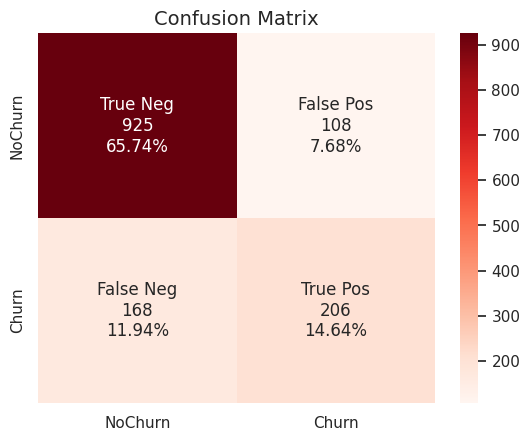

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



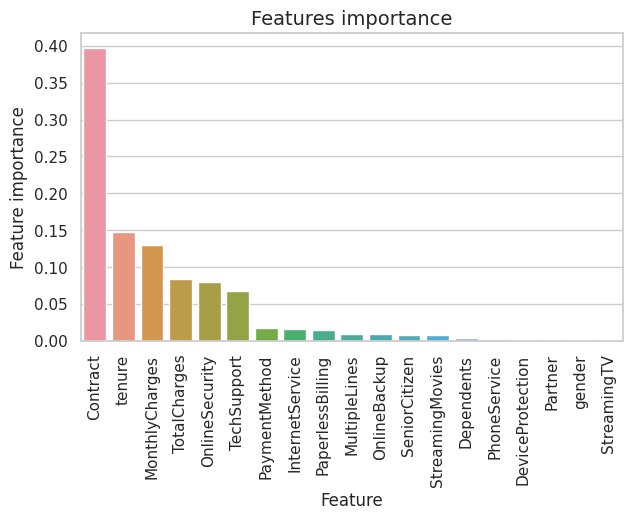

In [53]:
#GradientBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
classifier_gb = GradientBoostingClassifier()
model(classifier_gb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_gb,x_test1,y_test1)
model_imp(classifier_gb)

Cross Validation Score :  84.57%
ROC_AUC Score :  73.36%


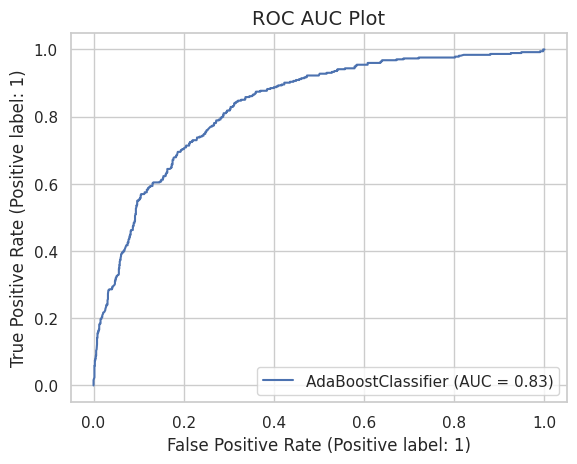

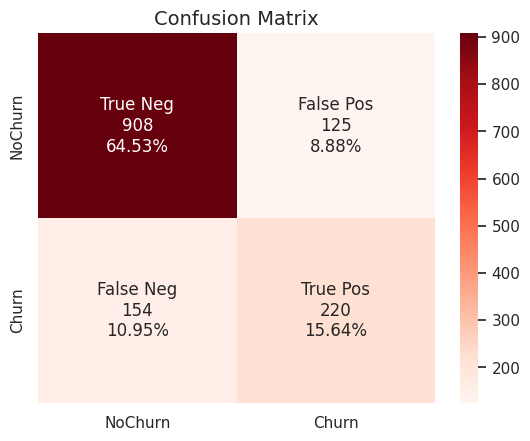

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.59      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



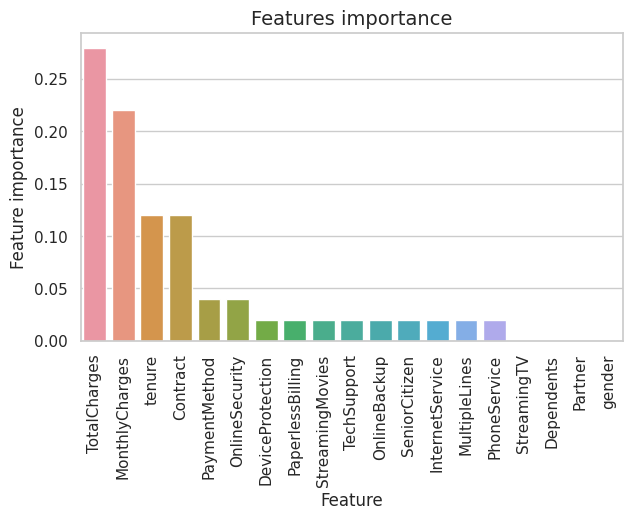

In [54]:
classifier_ada = AdaBoostClassifier()
model(classifier_ada,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_ada,x_test1,y_test1)
model_imp(classifier_ada)

Cross Validation Score :  84.65%
ROC_AUC Score :  69.44%


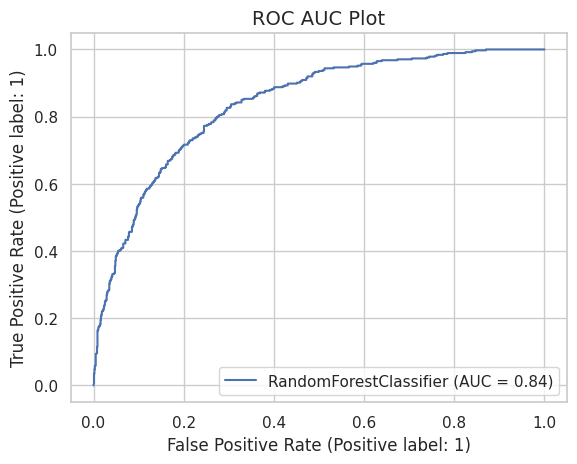

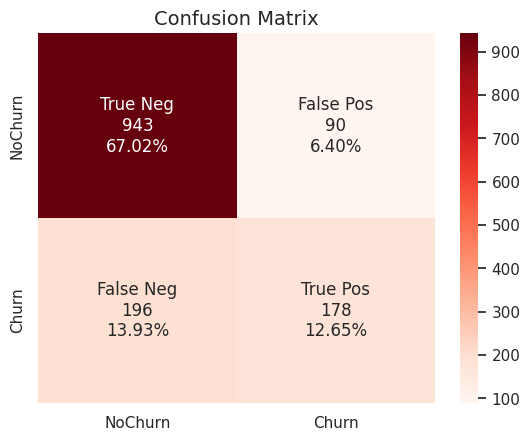

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.55       374

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



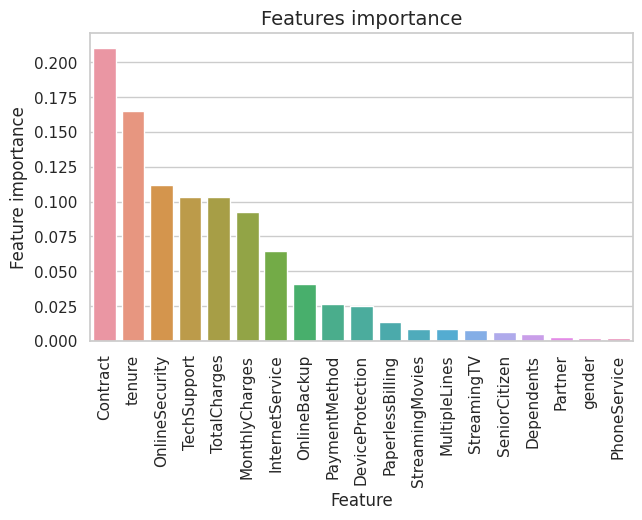

In [55]:
classifier_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)
model_imp(classifier_rf)

Based on the multiple evaluation metrics, we can go with the model Ada Boost Classifier.

# **Summary & Conclusion**

Customer churn poses a significant threat to a company's profitability, and addressing it requires a multifaceted approach. One of the most effective ways to combat customer churn is by developing a deep understanding of your customer base. This entails identifying customers who may be on the brink of churning and taking proactive measures to enhance their satisfaction.

Improving customer service should be a primary focus when tackling this issue. Prioritizing exceptional customer service can significantly reduce churn rates. Additionally, nurturing customer loyalty through tailored experiences and personalized services can be instrumental in curbing churn.

Another valuable strategy is to gather feedback from customers who have already churned. This feedback can provide invaluable insights into the reasons behind their departure, enabling the company to adopt a proactive stance in preventing future churn.

In summary, combatting customer churn requires a comprehensive approach that involves understanding, prioritizing customer satisfaction, delivering exceptional service, fostering loyalty, and learning from past churn experiences to build a more resilient customer base.
